In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

warnings.filterwarnings('ignore')
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
# Importing Data
diamonds = pd.read_csv('diamonds.csv')
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(diamonds.shape)

(53940, 10)


In [4]:
print(diamonds.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration
We are interested in exploring the price variable and determine whether it is symmetrical or skewed. Also, we want to check if it is unimodal or multimodal.

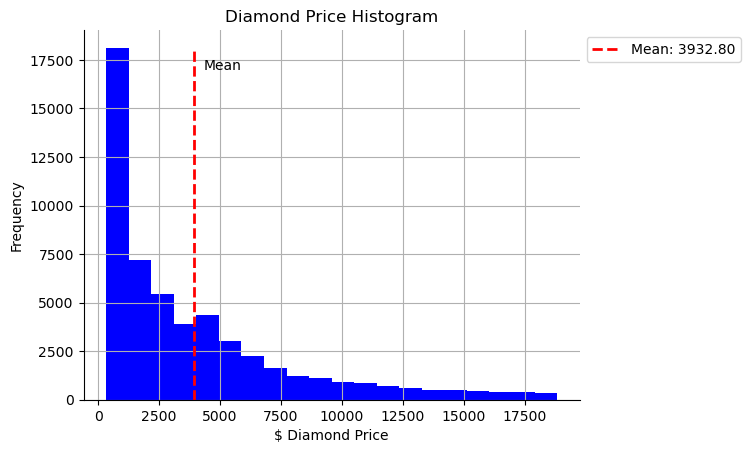

In [6]:
# Univariate Plot of Diamond Prices
d_med = diamonds['price'].mean()

plt.hist(data = diamonds, x = 'price', color = "blue", bins=20)
plt.axvline(x=d_med, color='red', ls='--', ymax=0.95, lw=2, label="Mean: {:.2f}".format(d_med))
plt.text(d_med*1.1,17000,'Mean',rotation=0)
plt.xlabel("$ Diamond Price")
plt.ylabel("Frequency")
plt.grid()
plt.title("Diamond Price Histogram")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left');

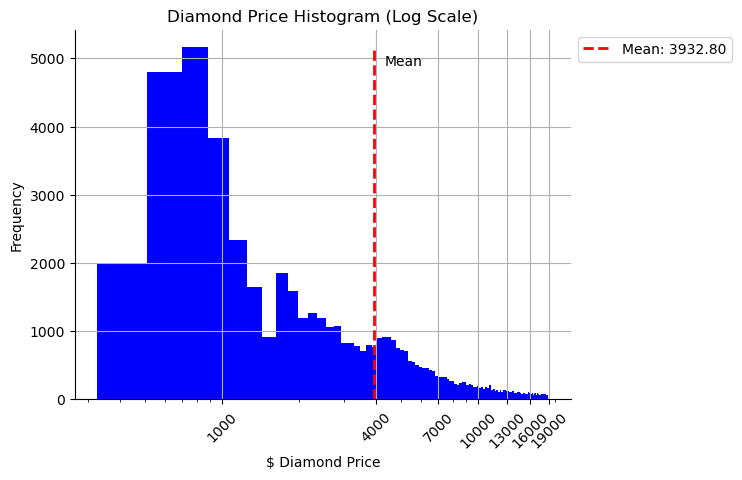

In [7]:
# Plotting histogram of diamond prices in logarithmic scale
ticks = np.linspace(1000, 19000, 7)
labels = ['{:.0f}'.format(v) for v in ticks] # Use ticks as labels in x axis

plt.hist(data = diamonds, x = 'price', color = "blue", bins = 100)
plt.axvline(x=d_med, color='red', ls='--', ymax=0.95, lw=2, label="Mean: {:.2f}".format(d_med))
plt.text(d_med*1.1,4900,'Mean',rotation=0)
plt.xlabel("$ Diamond Price")
plt.ylabel("Frequency")
plt.xscale('log')
plt.xticks(ticks, labels, rotation=45)
plt.grid()
plt.title("Diamond Price Histogram (Log Scale)")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left');

From this we can see that the distribution are skewed towards the right. This apply in both linear and logarithmic. This indicates that most of the diamonds in the dataset are priced lower than the mean price at $3932.80.

We can also see that based on the graph above, in both cases we can deduced that it is a bimodal distribution with peaks at 500 to 1000 and another peak at 4000 and 5000.

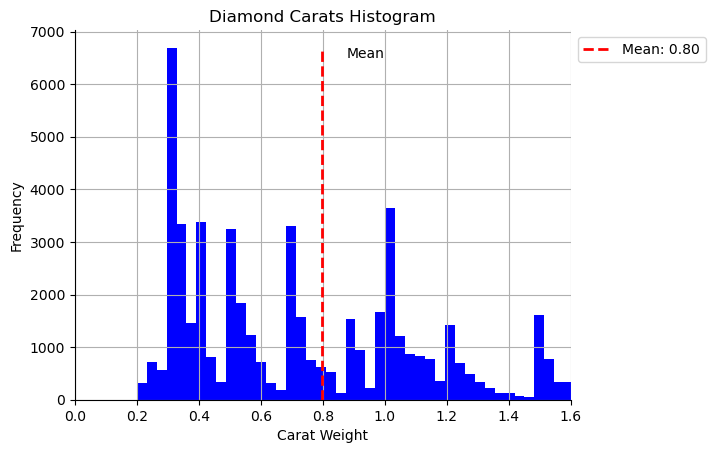

In [8]:
# Univariate Plot of Carat Weights
d_med = diamonds['carat'].mean()

plt.hist(data = diamonds, x = 'carat', color = "blue", bins=150)
plt.axvline(x=d_med, color='red', ls='--', ymax=0.95, lw=2, label="Mean: {:.2f}".format(d_med))
plt.text(d_med*1.1,6500,'Mean',rotation=0)
plt.xlabel("Carat Weight")
plt.ylabel("Frequency")
plt.xlim(0,1.6)
plt.grid()
plt.title("Diamond Carats Histogram")
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left');

The plots above was used to observed the distribution of carat weights in diamonds. We can see that the trend is that there is a spike in the decimals values and goes down until it reaches another spike. This indicates that there is a different standards for diamond cuts.

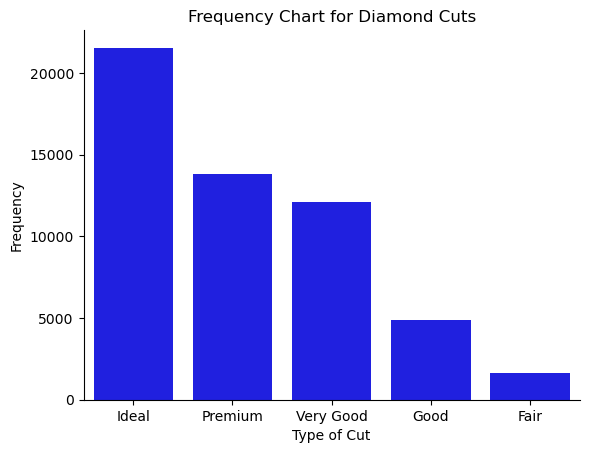

In [9]:
# Univariate Plots of Cut, Color, and Clarity grades

# Quality Measure: Cut
type_counts = diamonds['cut'].value_counts();
base_color = sns.color_palette()[0]
sns.countplot(data = diamonds, x = 'cut', color = "blue", order = type_counts.index);
plt.title("Frequency Chart for Diamond Cuts")
plt.xlabel("Type of Cut")
plt.ylabel("Frequency");

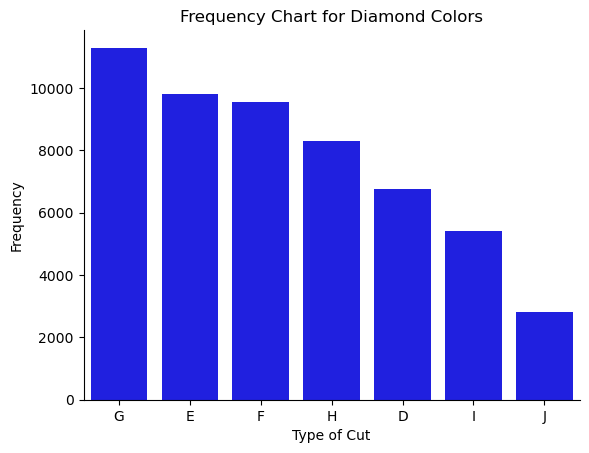

In [10]:
# Quality Measure: Color

type_counts = diamonds['color'].value_counts();

# Plot the graph
sns.countplot(data = diamonds, x = 'color', color = "blue", order = type_counts.index);
plt.title("Frequency Chart for Diamond Colors")
plt.xlabel("Type of Cut")
plt.ylabel("Frequency");

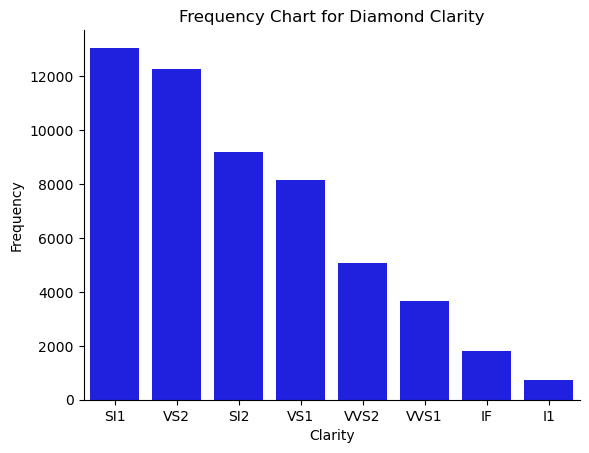

In [11]:
# Quality Measure: Clarity
# Let's plot a vertical bar chart for the diamond's clarity to get an idea of its distribution
type_counts = diamonds['clarity'].value_counts();

# Plot the graph
base_color = sns.color_palette()[0]
sns.countplot(data = diamonds, x = 'clarity', color = "blue", order = type_counts.index);
plt.title("Frequency Chart for Diamond Clarity")
plt.xlabel("Clarity")
plt.ylabel("Frequency");

## Bivariate Exploration 

In [12]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


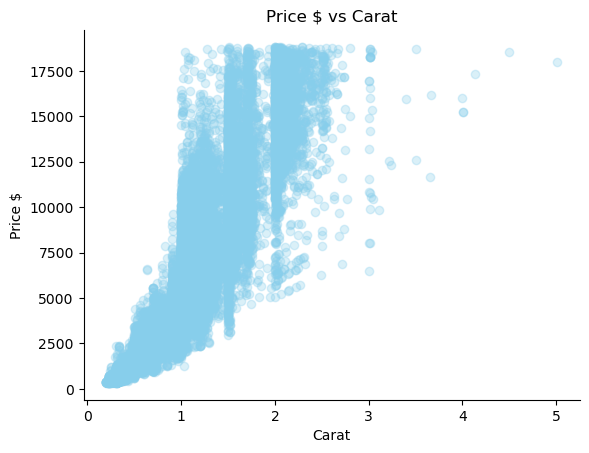

In [14]:
# bivariate plot of price vs. carat
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha = 0.3,color = "skyblue")
plt.xlabel("Carat")
plt.ylabel("Price $")
plt.title("Price $ vs Carat");

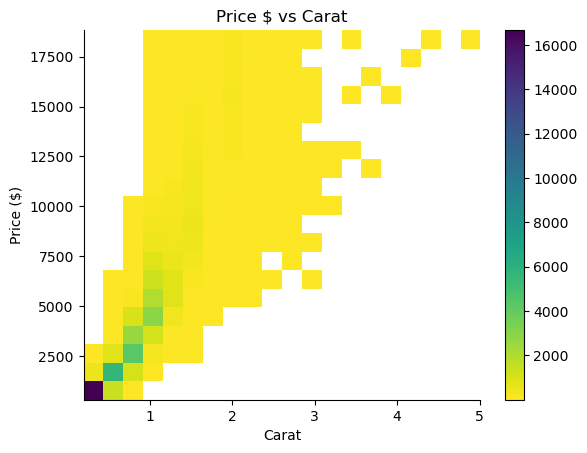

In [15]:
# heatmap of price vs carat
plt.hist2d(data = diamonds, x = 'carat', y = 'price', cmin=0.5, cmap="viridis_r", bins=20) #bins=[bins_x, bins_y])
plt.colorbar()
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.title("Price $ vs Carat");

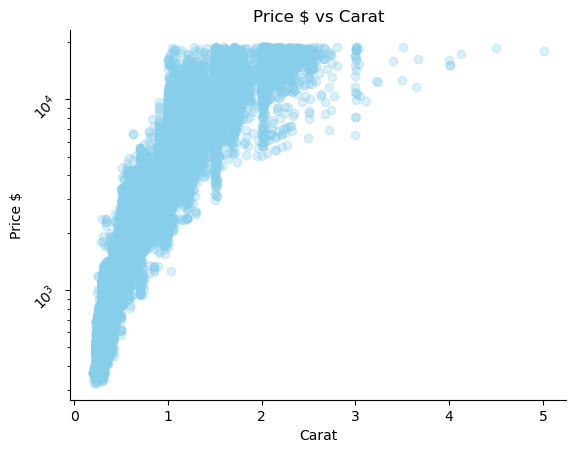

In [16]:
# Generate the x-tick labels to apply on logarithmic plot
# bivariate logarithmic plot of price vs. carat
plt.scatter(data = diamonds, x = 'carat', y = 'price', alpha = 0.3, color="skyblue")
plt.yticks(rotation=45)
plt.yscale('log')
plt.xlabel("Carat")
plt.ylabel("Price $")

plt.title("Price $ vs Carat");

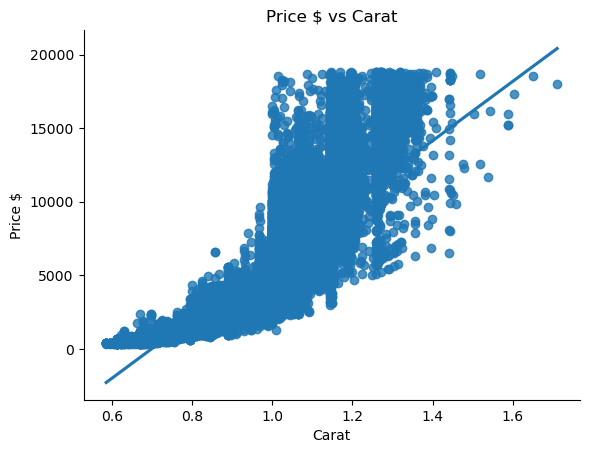

In [17]:
# Cube-root transformation function
# This is done to observe a linear trend between the variables
def cube_root(val):
    return val**(1/3)

sns.regplot(data = diamonds, x = diamonds['carat'].apply(cube_root), y = 'price')
plt.xlabel("Carat")
plt.ylabel("Price $")
plt.title("Price $ vs Carat");

### Observing relationship between price and the quality measures which are cut, clarity, and color. 

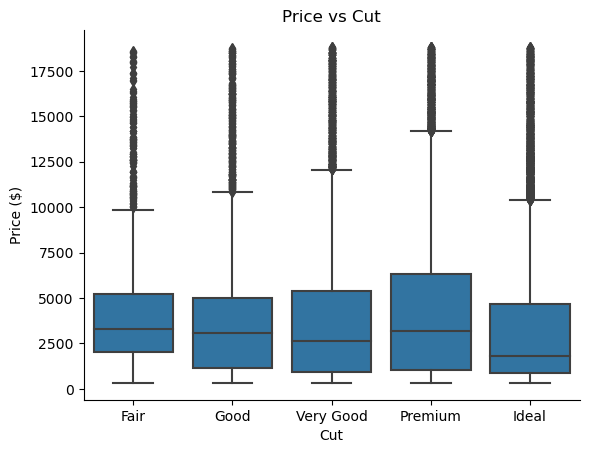

In [18]:
# Boxplot of Price vs Cut
base_color = sns.color_palette()[0]

sns.boxplot(data = diamonds, x = 'cut', y = 'price', color = base_color)
plt.title("Price vs Cut")
plt.ylabel("Price ($)")
plt.xlabel("Cut");

Based on the box plot above, most of the distribution between price and cut are mostly positively skewed significantly. This can be seen by the difference in length of the whiskers between the lower end of the box and the higher end.

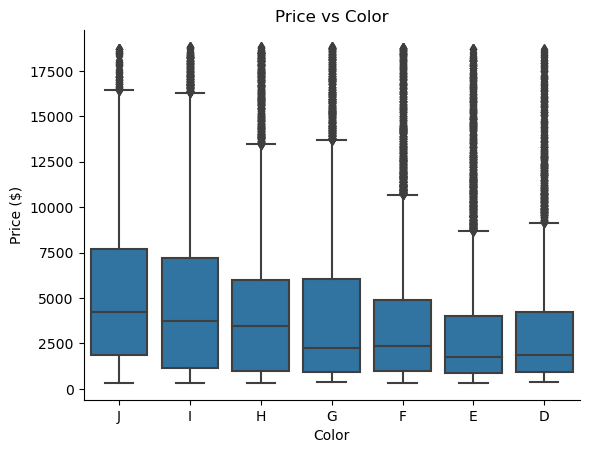

In [19]:
# Boxplot of Price vs Color
base_color = sns.color_palette()[0]
sns.boxplot(data = diamonds, x = 'color', y = 'price', color = base_color)
plt.title("Price vs Color")
plt.ylabel("Price ($)")
plt.xlabel("Color");

The trend in this boxplot is simliar to before where most of the distribution between the data are positively skewed significantly.

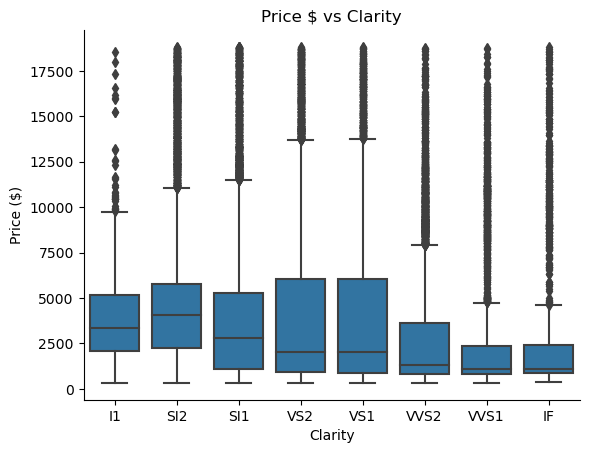

In [20]:
# Boxplot of Price vs Clarity
base_color = sns.color_palette()[0]
sns.boxplot(data = diamonds, x = 'clarity', y = 'price', color = base_color)
plt.title("Price $ vs Clarity")
plt.ylabel("Price ($)")
plt.xlabel("Clarity");

The trend also persevere in this boxplot.

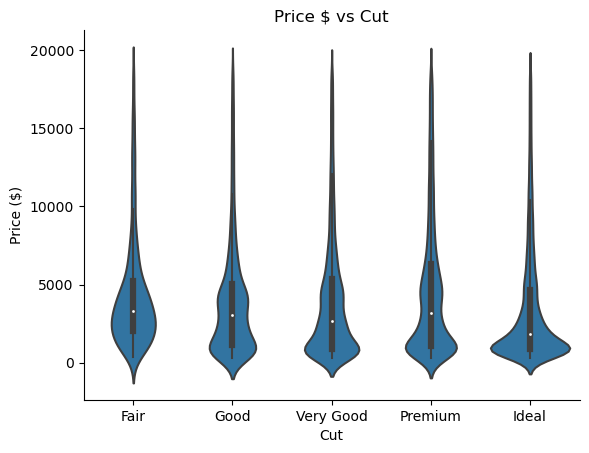

In [21]:
# Violin plot of Price vs Cut
sns.violinplot(data = diamonds, x = 'cut', y = 'price', color = base_color)
plt.title("Price $ vs Cut")
plt.ylabel("Price ($)")
plt.xlabel("Cut");

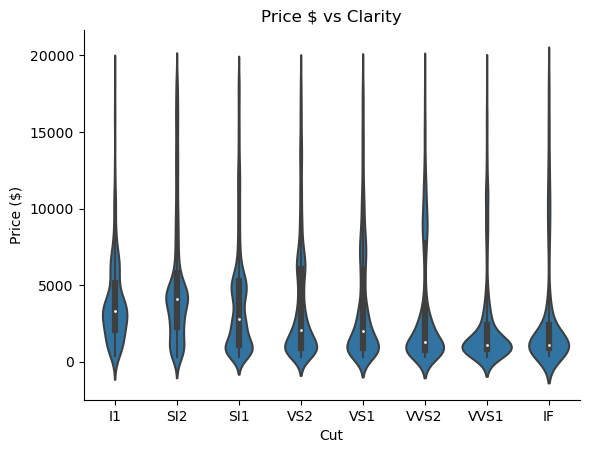

In [22]:
# Violin plot of Price vs Cut
sns.violinplot(data = diamonds, x = 'clarity', y = 'price', color = base_color)
plt.title("Price $ vs Clarity")
plt.ylabel("Price ($)")
plt.xlabel("Cut");

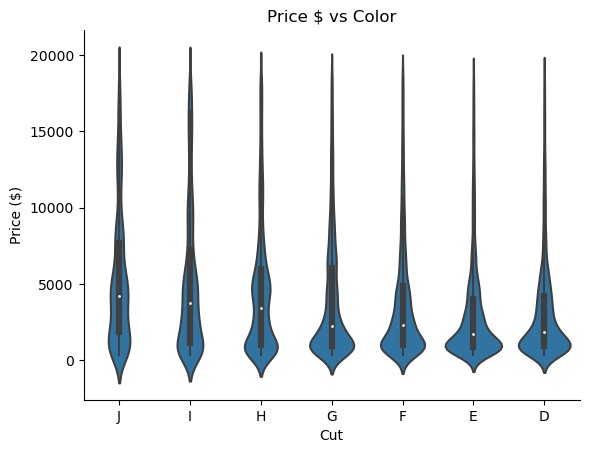

In [23]:
# Violin plot of Price vs Cut
sns.violinplot(data = diamonds, x = 'color', y = 'price', color = base_color)
plt.title("Price $ vs Color")
plt.ylabel("Price ($)")
plt.xlabel("Cut");

### Relationship between independent variables

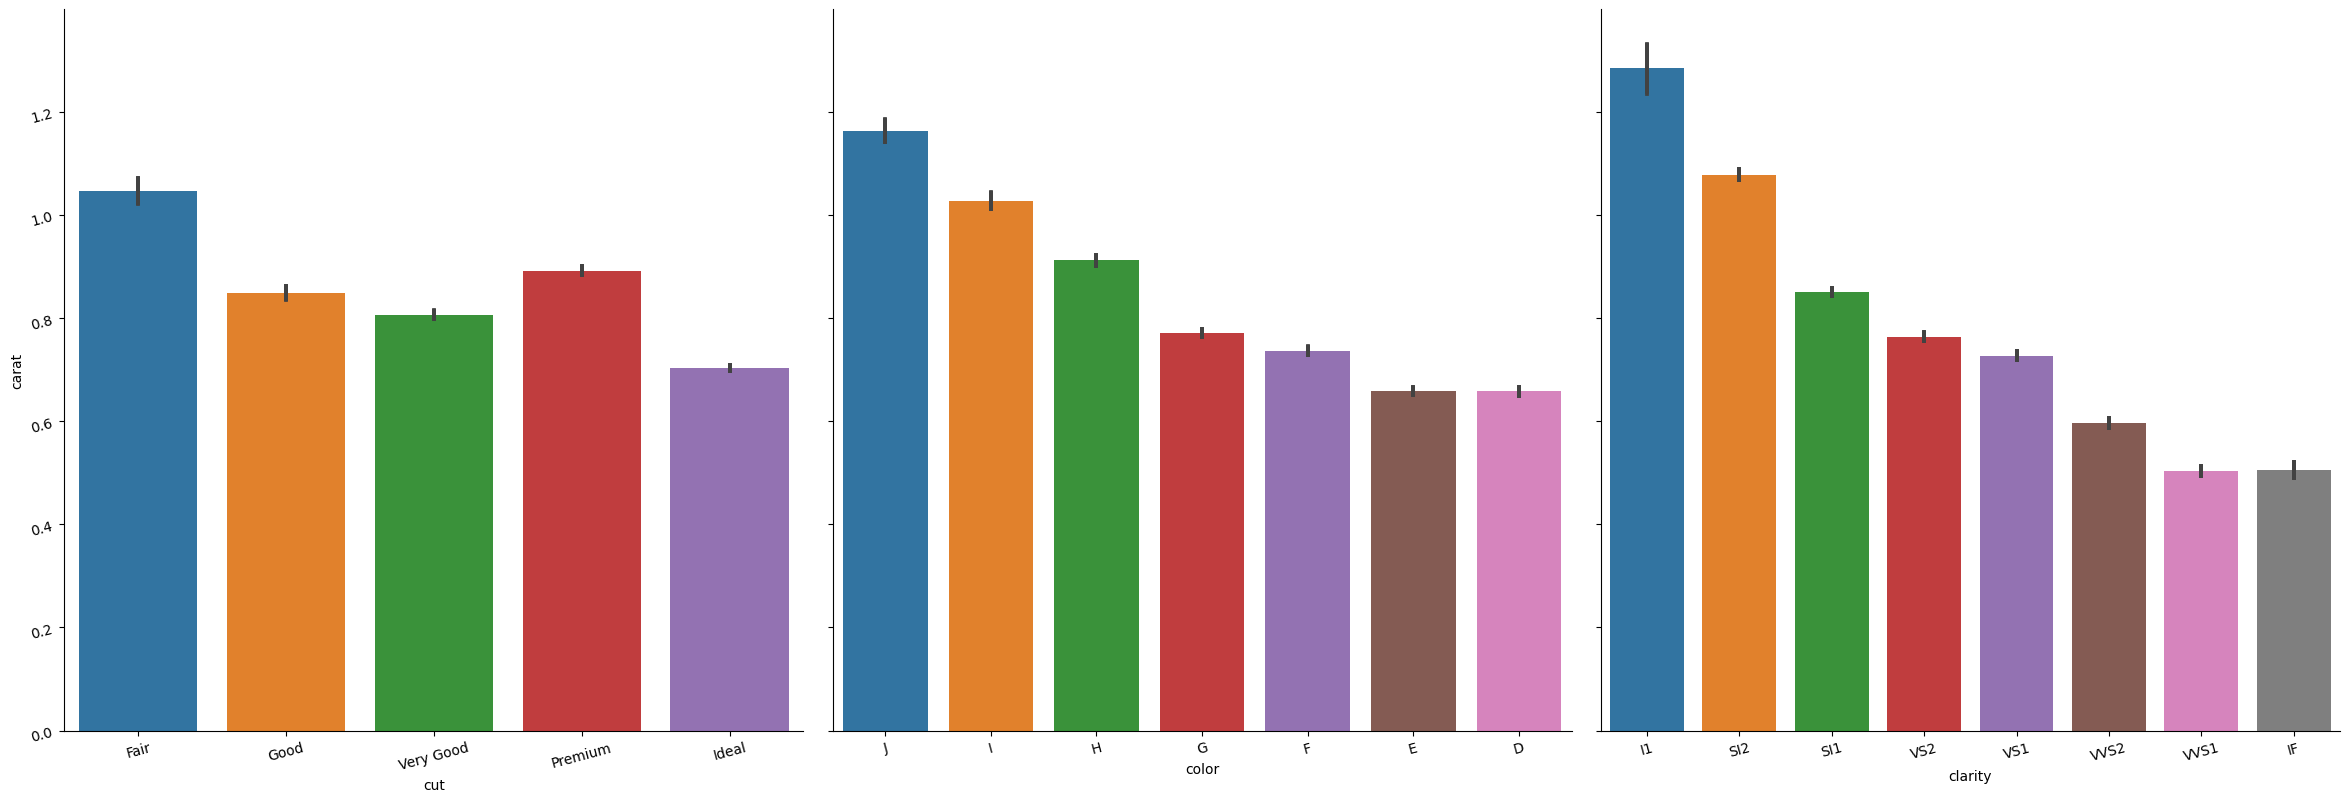

In [24]:
# bivariate plots of carat vs. cut, color, clarity
variables = ['cut', 'color', 'clarity']
g = sns.PairGrid(data = diamonds, x_vars=variables, y_vars='carat', size=8)

for ax in g.axes.flatten():
    g.map(sns.barplot);
    ax.tick_params(rotation = 15)


## Multivariate Exploration

In [25]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: 
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [26]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Before the log of price was approximately linearly related to the cube root of carat weight, as analogy to its length, width, and depth. There was also an unintuitive relationship between price and the categorical quality measures of cut, color, and clarity, that the median price decreased with increasing quality. Investigating the distributions more clearly and looking at the relationship between carat weight with the three categorical variables showed that this was due to carat size tending to be smaller for the diamonds with higher categorical grades. Next is to depict these interaction effects through the use of multivariate plots

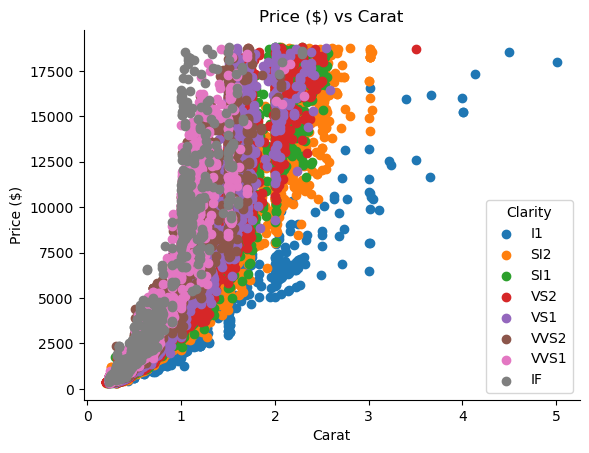

In [27]:
# multivariate plot of price by carat weight, and clarity
cat_markers = [['I1', 'o'], ['SI2', 'o'], ['SI1', 'o'], ['VS2', 'o'], ['VS1', 'o'], 
               ['VVS2', 'o'], ['VVS1', 'o'],['IF', 'o']]

for cat, marker in cat_markers:
    df_cat = diamonds[diamonds['clarity'] == cat]
    plt.scatter(data = df_cat, x = 'carat', y = 'price', marker = marker)
    
plt.legend(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], title = 'Clarity')
plt.xlabel('Carat')
plt.ylabel('Price ($)')
plt.title("Price ($) vs Carat");

Since we have two numeric variables and one categorical variables, it makes sense to visualize these relationships with either a faceted scatter plot or a heat map.

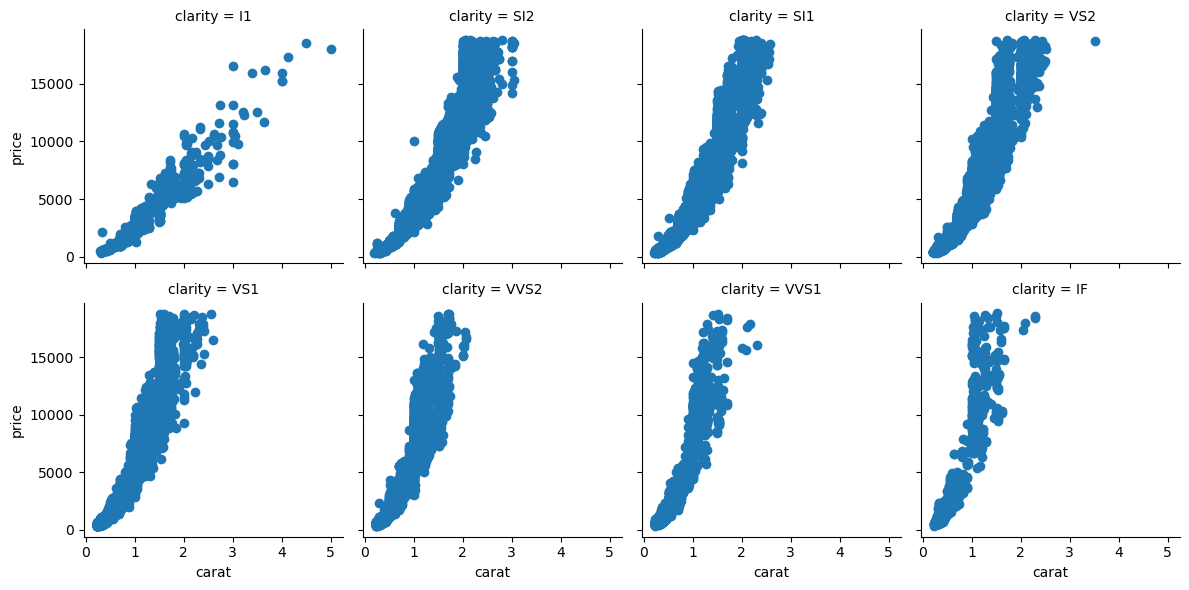

In [28]:
g = sns.FacetGrid(data = diamonds, col = 'clarity', col_wrap = 4)
g.map(plt.scatter, 'carat', 'price');

From the plots above, we can observed that the trend is upward and towards the left corresponding with smaller diamond sizes. We have to apply transformation on the data in order to avoid a higher quality grades associated with smaller diamonds which has a lower price.

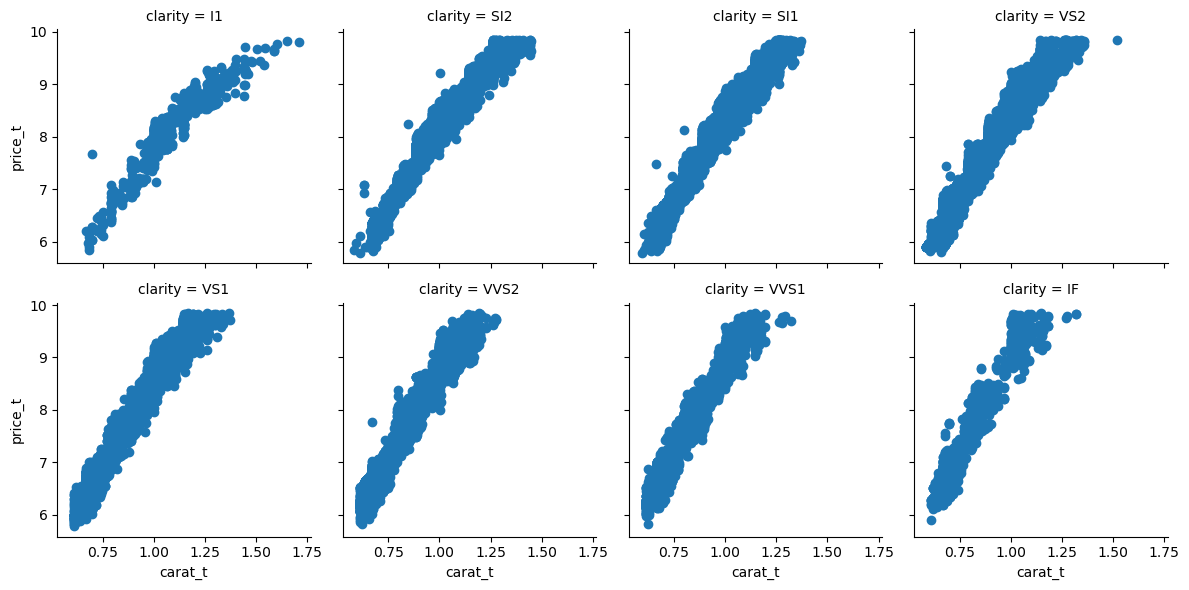

In [32]:
# Log transform for the Price
# Cube Root transform for the Carat values

# Cube-root transformation function
def cube_root(val):
    return val**(1/3)

def log(val):
    return math.log(val)

diamonds['carat_t'] = diamonds['carat'].apply(cube_root)
diamonds['price_t'] = diamonds['price'].apply(log)

g = sns.FacetGrid(data = diamonds, col = 'clarity', col_wrap = 4)
g.map(plt.scatter, 'carat_t', 'price_t');

We can improve our understanding by using a bar plot and plot only for a small range of weights. The plot shown below will only show the distribution of diamonds with weight in between 0.98 and 1.02

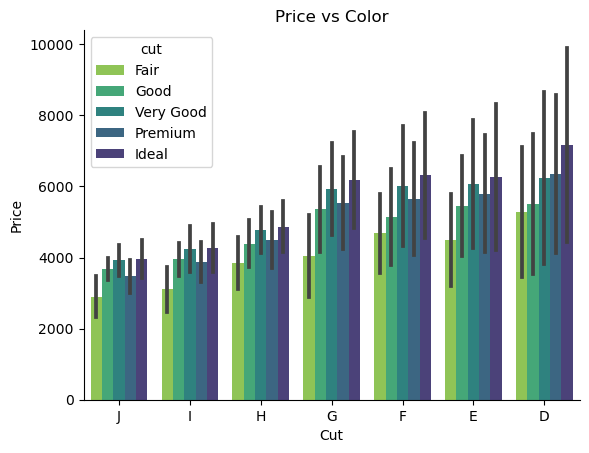

In [34]:
# multivariate plot of price by cut and color, for approx. 1 carat diamonds
# Using a Clustered Bar Chart

# Set the dataframe filter to retrieve values between 0.97 and 1.03, inclusive.
carat_filter_df = diamonds.loc[ (diamonds['carat'] >= 0.98) & (diamonds['carat'] <= 1.02)]


# Log transform for the Price
# Cube Root transform for the Carat values
def cube_root(val):
    return val**(1/3)

def log(val):
    return math.log(val)

diamonds['carat_t'] = diamonds['carat'].apply(cube_root)
diamonds['price_t'] = diamonds['price'].apply(log)

sns.barplot(data = carat_filter_df, x = 'color', y = 'price', 
           hue = 'cut', ci = 'sd', palette = 'viridis_r');

plt.ylabel("Price")
plt.xlabel("Cut")
plt.title("Price vs Color");

We can also use a clustered point plot for this case. As shown in the plots below.

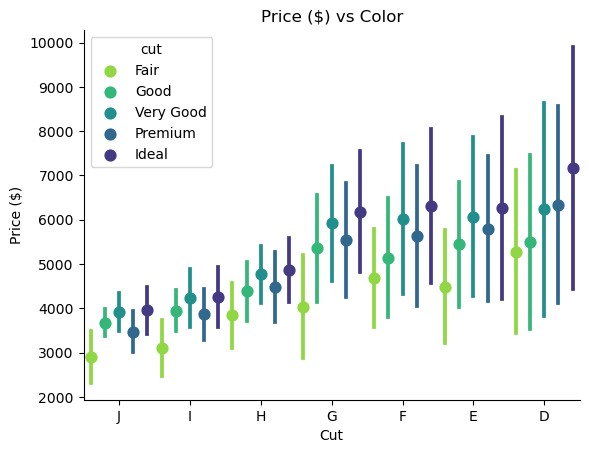

In [39]:
# Instead of using a Bar Plot, let's use a Clustered Point Plot.
sns.pointplot(data = carat_filter_df, x = 'color', y = 'price', 
             ci = 'sd', linestyles = "", dodge = 0.8, hue = 'cut', palette='viridis_r')

plt.ylabel("Price ($)")
plt.xlabel("Cut")
plt.title("Price ($) vs Color");

The clustered box plot or the clustered point plot are the best choice to visualize this data. This is because the number of category combinations to be plotted (7x5 = 35), it's hard to make full sense of a violin plot's narrow areas; simplicity is better. A clustered bar chart could work, but considering that price should be on a log scale, there isn't really a nice baseline that would work well

Based on the clustered plot, we can see that there was a gradual increase in price across the main x-value clusters, as well as generally upwards trends within each cluster for the third variable.